## Importing packages

In [5]:
%load_ext autoreload
%autoreload 2
import scqubits as sq
import scipy.constants as const
from utilities import *
filedirectory = "//Users//joancaceres//Documents//FERBO//FB_W10_S4//run2//"

phi0 = const.h/2/const.e/2/np.pi
Rq = const.h/(2*const.e)**2
%matplotlib qt

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## Loading data

## Single tone spectroscopy

In [111]:
sts = load_data(filedirectory + "\\FBW10S4_" + str(400614))
sts.keys()

dict_keys(['gain', 'freq', 'amp', 'phase', 'I', 'Q'])

In [137]:
fig, ax,mesh = plot_phase_map(sts,
                         x_key='freq',
                         y_key='gain',
                         z_key='amp',
                         title='hi',
                         correct_vertical=0,
                         correct_horizontal=0,
                         figsize=(8,5),
                         cmap='viridis',
                        #  vmin=-30
                         )
plt.show()


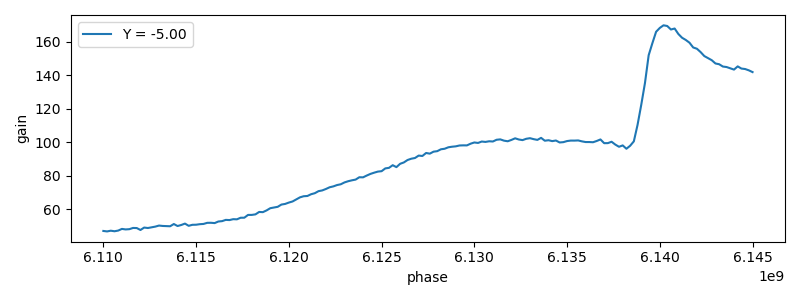

In [215]:
plt.close('all')
%matplotlib widget
fig, ax = plot_1d_line(datasets[400614], fixed_x=None,fixed_y=-5, x_key='freq', y_key="gain", z_key='phase', tolerance=1,apply_vertical_correction=0, apply_horizontal_correction=0, figsize=(8,3))
# plot_1d_line(datasets, fixed_x=None,fixed_y=-8, x_key='freq', y_key="gain", z_key='amp', tolerance=1,apply_vertical_correction=0, apply_horizontal_correction=0, fig=fig, ax=ax)
# plot_1d_line(datasets, fixed_x=None,fixed_y=-10, x_key='freq', y_key="gain", z_key='amp', tolerance=1,apply_vertical_correction=0, apply_horizontal_correction=0, fig=fig, ax=ax)
# plt.show()

## Two tone spectroscopy

In [2]:
datasets = {}

In [6]:
full_scan_number = 422958
datasets[full_scan_number] = load_data(filedirectory + "FBW10S4_" +str(full_scan_number))
datasets[full_scan_number]['freq'] = datasets[full_scan_number]['freq']*1e-9

In [15]:
z_axis = 'Q'
fig, ax,mesh = plot_phase_map(datasets[full_scan_number],
                         x_key='flux',
                         y_key='freq',
                         z_key=z_axis,
                         title=full_scan_number,
                         correct_vertical=1,
                         correct_horizontal=1,
                         cmap='viridis',
                        #  vmax=3
                         )

fig.colorbar(mesh, ax=ax, label=z_axis)

plt.show()

In [3]:
datanumber = last_measurument(filedirectory)
datasets[datanumber] = load_data(filedirectory + "\\FBW10S4_" +str(datanumber))

In [67]:
datasets[datanumber].keys()

dict_keys(['flux', 'freq', 'amp', 'phase', 'I', 'Q'])

In [15]:
fig, ax,mesh = plot_phase_map(datasets[datanumber],
                         x_key='flux',
                         y_key='freq',
                         z_key='amp',
                         title=datanumber,
                         correct_vertical=1,
                         correct_horizontal=1,
                         cmap='viridis',
                        #  vmax=3
                         )

fig.colorbar(mesh, ax=ax, label='amp')
# ax.set_xlim([datasets[datanumber]['parameters']['flux_start'], datasets[datanumber]['parameters']['flux_stop']])
# ax.set_ylabel('Frequency [GHz]',fontsize=14)
# ax.set_xlabel(r'$\Phi/\Phi_0$',fontsize=14)
plt.show()

In [14]:
full_scan_number

400614

In [17]:
fig, ax = plot_1d_line(datasets[full_scan_number],
                       fixed_x=None,
                       fixed_y=-5,
                       x_key='freq',
                       y_key='gain',
                       z_key='phase',
                       tolerance=1,
                       apply_vertical_correction=0,
                       apply_horizontal_correction=0,
                       figsize=(8,3)
                       )
# plt.show()

### LO and IF frequencies

In [59]:
fmin = 6.85e9
fmax = 7.1e9
fstep = 0.2e6

range = fmax - fmin
LO_numbers = int(range//250e6 + 1)
centro = (fmin + fmax) / 2
k = np.round(centro / 250e6)
offset = np.arange(-(LO_numbers//2), (LO_numbers//2) + 1)
multiplos = 250e6 * (k + offset)
multiplos = multiplos[np.argsort(np.abs(multiplos - centro))]
vals = multiplos[:LO_numbers]
LO_frequencies = np.sort(vals)

IF_min = int(fmin - np.min(LO_frequencies))
IF_span = int(range/LO_numbers - fstep)
IF_max = int(IF_min + IF_span)
IF_frequencies = np.arange(IF_min,IF_max,fstep+1)
# rango = np.arange(k - LO_numbers//2, k + LO_numbers//2 + 1)
# multiplos = 250e6 * rango

## Fluxonium fit

In [76]:
params = (11,0.81,0.369)
EJ,EC,EL = params
fluxonium = sq.Fluxonium(*params,flux = 0,cutoff=40)
flux_array = np.linspace(-0.5, 0.5, 1001)

spectrum_data = fluxonium.get_matelements_vs_paramvals(
    operator='phi_operator',
    param_name='flux',
    param_vals=flux_array,
    evals_count=6
)

evals_matrix = spectrum_data.energy_table
transitions0 = evals_matrix - evals_matrix[:,0].reshape(-1,1)
transitions1 = evals_matrix - evals_matrix[:,1].reshape(-1,1)
transitions2 = evals_matrix - evals_matrix[:,2].reshape(-1,1)

transitions0 = np.delete(transitions0,0,axis=1)
transitions1 = np.delete(transitions1,[0,1],axis=1)
transitions2 = np.delete(transitions2,[0,1,2],axis=1)

matrix_element = spectrum_data.matrixelem_table
transition0_matrix_element = np.abs(matrix_element[:,:,0])**2
transition1_matrix_element = np.abs(matrix_element[:,:,1])**2
transition2_matrix_element = np.abs(matrix_element[:,:,2])**2

transition0_matrix_element = np.delete(transition0_matrix_element,0,axis=1)
transition1_matrix_element = np.delete(transition1_matrix_element,[0,1],axis=1)
transition2_matrix_element = np.delete(transition2_matrix_element,[0,1,2],axis=1)

Spectral data:   0%|          | 0/1001 [00:00<?, ?it/s]

In [79]:
fluxonium2 = sq.Fluxonium(*params,flux = 0.5,cutoff=40)

In [81]:
fluxonium2.E01()

0.002479754792299005

In [53]:
max0_matrix_elem = np.max(transition0_matrix_element)
max1_matrix_elem = np.max(transition1_matrix_element)
max2_matrix_elem = np.max(transition2_matrix_element)
max(max0_matrix_elem,max1_matrix_elem,max2_matrix_elem)

35.34245482909079

### Single lines fitting

In [78]:
fig,ax = plt.subplots(1,1)
ax.plot(flux_array,transitions0,color='C0')
# ax.plot(flux_array,transitions1,color='C1')
# ax.plot(flux_array,transitions2,color='C2')
# ax.set_ylim(bottom=0)
plt.show()

In [33]:
flux_array_repeated = np.repeat(flux_array[:, np.newaxis], 5, axis=1)

# Calculamos las transparencias (alpha) de forma vectorizada
max_val = max(max0_matrix_elem, max1_matrix_elem, max2_matrix_elem)
alpha_values0 = transition0_matrix_element / max_val
alpha_values1 = transition1_matrix_element / max_val
alpha_values2 = transition2_matrix_element / max_val

# Configuración del gráfico
fig, ax = plt.subplots(1, 1)

# Hacemos el plot de manera vectorizada
# Cada columna se representa como una línea diferente
for j in range(5):
    ax.scatter(flux_array, transitions0[:, j], marker='.', c=np.log(alpha_values0[:, j]), cmap='Blues', s=10)
# for j in range(4):
#     ax.scatter(flux_array, transitions1[:, j], marker='.', c=np.log(alpha_values1[:, j]), cmap='Reds', s=10)
# for j in range(3):
#     ax.scatter(flux_array, transitions2[:, j], marker='.', c=np.log(alpha_values2[:, j]), cmap='Greens', s=10)

plt.show()

## Fluxonium + Resonator fitting

In [39]:
params = (11,1.81,0.4)
EJ,EC,EL = params

EL_fluxonium = EL*134/(134-14)
EL_shared = EL*134/14
EL_resonator = EL*134/(152+14)
resonator_frequency = 6.137
EC_resonator = resonator_frequency**2/8/EL_resonator

flux_res_dict = f"""
branches:
- ["JJ", 1,2, {EJ}, {EC}]
- ["L", 2,3, {EL_fluxonium}]
# Coupling inductance
- ["L", 1,3, {EL_shared}]
# JJA resonator
- ["L", 3,4, {EL_resonator}]
- ["C", 4,1, {EC_resonator}]
"""

fluxonium_resonator = sq.Circuit(
    input_string=flux_res_dict,
    from_file=None,
    ext_basis='harmonic'
)

flux1_array = np.linspace(-0.5,0.5,101)

spectrumData_fluxres = fluxonium_resonator.get_matelements_vs_paramvals(
    operator='θ2_operator',
    param_name='Φ1',
    param_vals=flux1_array,
    evals_count=10)

spectra_fluxres = spectrumData_fluxres.energy_table

transitions0 = spectra_fluxres - spectra_fluxres[:,0].reshape(-1,1)
transitions1 = spectra_fluxres - spectra_fluxres[:,1].reshape(-1,1)
transitions2 = spectra_fluxres - spectra_fluxres[:,2].reshape(-1,1)

transitions0 = np.delete(transitions0,0,axis=1)
transitions1 = np.delete(transitions1,[0,1],axis=1)
transitions2 = np.delete(transitions2,[0,1,2],axis=1)


matrix_element = spectrumData_fluxres.matrixelem_table
transition0_matrix_element = np.abs(matrix_element[:,:,0])**2
transition1_matrix_element = np.abs(matrix_element[:,:,1])**2
transition2_matrix_element = np.abs(matrix_element[:,:,2])**2

transition0_matrix_element = np.delete(transition0_matrix_element,0,axis=1)
transition1_matrix_element = np.delete(transition1_matrix_element,[0,1],axis=1)
transition2_matrix_element = np.delete(transition2_matrix_element,[0,1,2],axis=1)


max0_matrix_elem = np.max(transition0_matrix_element)
max1_matrix_elem = np.max(transition1_matrix_element)
max2_matrix_elem = np.max(transition2_matrix_element)
max_val = max(max0_matrix_elem, max1_matrix_elem, max2_matrix_elem)

Spectral data:   0%|          | 0/101 [00:00<?, ?it/s]

In [35]:
fig,ax = plt.subplots(1,1)
ax.plot(flux1_array,spectra_fluxres)
plt.show()

In [40]:
fig,ax = plt.subplots(1,1)
ax.plot(flux1_array,transitions0, color='C0')
# ax.plot(flux1_array,transitions1, color='C1')
# ax.plot(flux1_array,transitions2, color='C2')
plt.show()

In [19]:
# Calculamos las transparencias (alpha) de forma vectorizada

alpha_values0 = transition0_matrix_element / max_val
alpha_values1 = transition1_matrix_element / max_val
alpha_values2 = transition2_matrix_element / max_val

# Configuración del gráfico
fig, ax = plt.subplots(1, 1)

# Hacemos el plot de manera vectorizada
# Cada columna se representa como una línea diferente
for j in range(5):
    ax.scatter(flux1_array, transitions0[:, j], marker='.', c=np.log(alpha_values0[:, j]), cmap='Blues', s=10)
for j in range(4):
    ax.scatter(flux1_array, transitions1[:, j], marker='.', c=np.log(alpha_values1[:, j]), cmap='Reds', s=10)
for j in range(3):
    ax.scatter(flux1_array, transitions2[:, j], marker='.', c=np.log(alpha_values2[:, j]), cmap='Greens', s=10)

plt.show()